In [84]:
### Pick the file directory
directory_list = ['/media/ab/data/Research_Data/EnhancerCon/TSS3/']


Directory:  /media/ab/data/Research_Data/EnhancerCon/TSS3/
Filename:  H3K27Ac.TSS3.txt
Number of regions:  3239


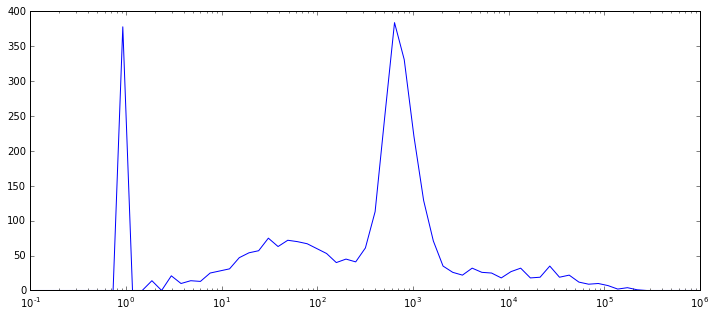

Directory:  /media/ab/data/Research_Data/EnhancerCon/TSS3/
Filename:  H3K4Me3.H3K27Ac.TSS3.txt
Number of regions:  12263


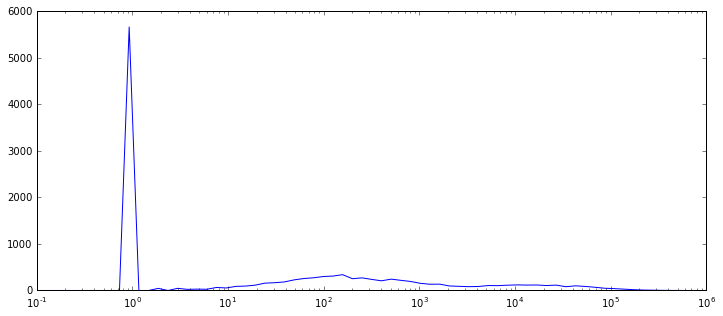

Directory:  /media/ab/data/Research_Data/EnhancerCon/TSS3/
Filename:  H3K4Me3.TSS3.txt
Number of regions:  8885


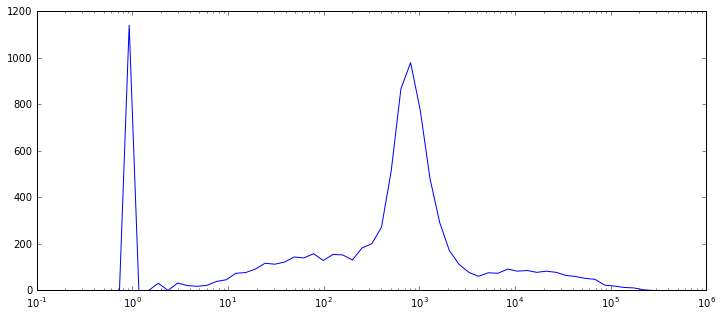

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [98]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
from matplotlib.ticker import FuncFormatter


def main():  
    
    for directory in directory_list:
        file_filter = '.TSS3.txt'
        all_data = []
        data_labels = []
        dir_list = sorted(os.listdir(directory))
        #print dir_list
        for filename in dir_list:
            rawCounts = []
            if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
                rawCounts = load_from_file(directory+filename)
                #all_data.append(conScores)
                #data_labels.append(filename)
                make_graphs(rawCounts, filename, directory)

def load_from_file(file_to_open):              
    
    countCol = 0
    distanceCol = 0
    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        distance = (line.strip('\n').split('\t')[distanceCol])   # Split the line
        if distance != '':
            if int(distance) == 0:
                distance = 1
            data.append(int(distance))            # if valid, append to data
    #print "positions with no score" = ", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    return data                                       # return data from file

def make_graphs(allData, filename, directory):
    
    dataPoints = len(allData)
    print "Directory: ", directory
    print "Filename: ", filename
    print "Number of regions: ", dataPoints
    #print allData
    
    
    MIN, MAX = (10**-1), (10**6)

    numberBINS = 70
    BINS = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), numberBINS)

    LINES = True
    BARS = False
    fig, axs = plt.subplots(figsize=(12,5))
    axs.set_xlim(MIN, MAX) 
    #axs.set_ylim(0.5, num_files + 0.5)
    if BARS == True:
        plt.hist(allData, bins=BINS, normed=0)
    if LINES == True:
        y,binEdges=np.histogram(allData,bins=BINS)
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        plt.plot(bincenters,y,'-')
    
    #formatter = FuncFormatter(to_percent)
    #plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.gca().set_xscale("log")
    
    #plt.gca().ticklabel_format(style='plain', axis='x')
    #plt.update_ticks()
    
    plt.show()   
    
if __name__ == "__main__":
    sys.exit(main())

In [10]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(size=10000)

MIN, MAX = .001, 10000

fig, axs = plt.subplots(figsize=(5,5))
plt.hist(data, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
axs.set_xlim(MIN, MAX) 
#axs.set_ylim(0.5, num_files + 0.5)


plt.gca().set_xscale("log")
plt.show()

In [78]:
print (5/float(3))

1.66666666667


In [79]:
x = [5, 2, 3]
print x
print sum(x)
print [float(i) / sum(x) for i in x]

[5, 2, 3]
10
[0.5, 0.2, 0.3]
